In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv",index_col=0)

In [3]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


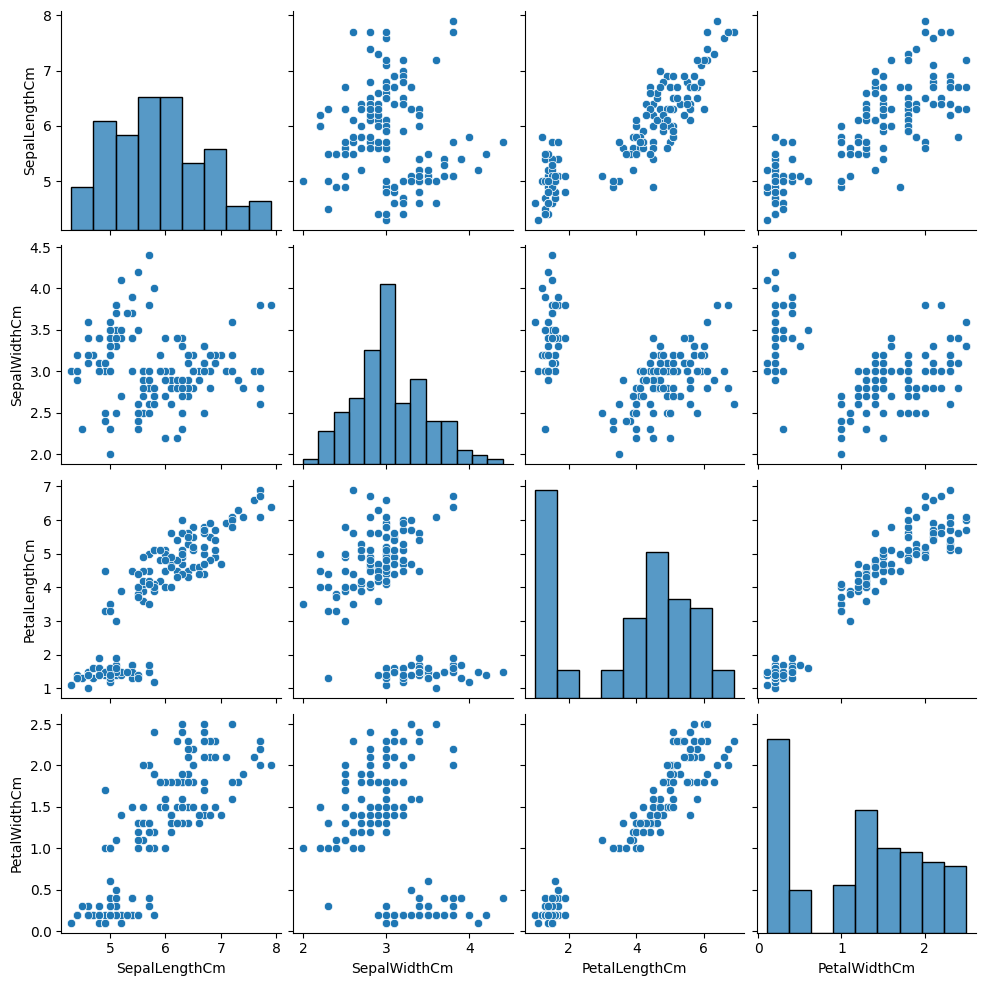

In [ ]:
sns.pairplot(df) #just by looking at the graph we assume that there are only 2 classes

In [5]:
df['Species'].value_counts() # there are actually 3 classes. 2 classes might be overlapping

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
sns.pairplot(df,hue = 'Species') # now we can see 3 classes
# in 2D subspace they are overlapped. In 3D subspace it will not overlap.

In [ ]:
df.head()

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

In [8]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [10]:
from sklearn.svm import SVC

In [11]:
svc = SVC() # use default values because data is in good format

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df.iloc[:,:-1]
y = df['Species']

In [ ]:
y

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [17]:
y_train

Id
62     1
93     1
113    2
3      0
142    2
      ..
10     0
104    2
68     1
118    2
48     0
Name: Species, Length: 112, dtype: object

In [20]:
y_train = le.fit_transform(y_train)

In [21]:
df['Species'].unique()

array([0, 1, 2], dtype=object)

In [22]:
svc.fit(x_train,y_train)

SVC()

In [23]:
ypred = svc.predict(x_test)

In [24]:
ypred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [25]:
from sklearn.metrics import classification_report

In [27]:
y_test = le.fit_transform(y_test)

In [28]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [29]:
print(svc.score(x_train,y_train),svc.score(x_test,y_test))

0.9642857142857143 0.9736842105263158


# **Hyperparameter Tuning**

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {
    'C' : [0.1,0.001,1,2,3,4,5],
    'kernel' : ['linear','poly','rbf'],
    'gamma' : [0.1,0.001,1,2,5]
} # Check Documentation for C, kernel and gamma values: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [32]:
grid = GridSearchCV(SVC(),param_grid=params,verbose=1) # try verbose = 0


In [33]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 2, 3, 4, 5],
                         'gamma': [0.1, 0.001, 1, 2, 5],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [ ]:
x_train

In [34]:
# check optimal value of c gamma and kernel
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [35]:
svc = SVC(C=0.1,gamma=0.1,kernel='poly')

In [36]:
svc.fit(x_train,y_train)
ypred = svc.predict(x_test)

In [37]:
print('Training Accuracy',svc.score(x_train,y_train))
print('Testing Accuracy',svc.score(x_test,y_test))

Training Accuracy 0.9821428571428571
Testing Accuracy 0.9736842105263158


In [38]:
dict = {'SepalLengthCm': [5.1,4.7,4.7,6.7,6.3,6.5], 'SepalWidthCm': [3.5,3.0,3.2,3.0,2.5,3.0], 'PetalLengthCm': [1.4,1.4,1.3,5.2,5.0,5.2], 'PetalWidthCm':[0.2,0.2,0.2,2.3,1.9,2.0]}

In [39]:
newdata = pd.DataFrame(dict)

In [40]:
svc.predict(newdata)

array([0, 0, 0, 2, 2, 2])